## Bilinear Interpolation

#### Image centering
- $SrcX + 0.5 = (dstX+0.5)*(srcW/dstW)$
- $SrcY + 0.5 = (dstY+0.5)*(srcH/dstH)$

#### Bilinear Interpolation
- $$dst(x,y) = \frac{y_2-y}{y_2-y_1} (\frac{x_2-x}{x_2-x_1}f(Q_{11}) + \frac{x-x_1}{x_2-x_1}f(Q_{21})) + \frac{y-y_1}{y_2-y_1} (\frac{x_2-x}{x_2-x_1}f(Q_{12}) + \frac{x-x_1}{x_2-x_1}f(Q_{22}))$$
- $y_2 - y_1 = 1; x_2-x_1 = 1$
It can be simplified as:
$$dst(x,y) = (y_2-y)((x_2-x)f(Q_{11}) + (x-x_1)f(Q_{21})) + (y-y_1) ((x_2-x)f(Q_{12}) + (x-x_1)f(Q_{22}))$$

**双线性差值法的计算比最邻近插值法复杂，计算量较大，但没有灰度不连续的缺点，图像看起来更光滑。**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def bilinear_interpolation(img, out_dim):
    src_h, src_w, channels = img.shape
    dst_h, dst_w = out_dim
    if src_h == dst_h and src_w == dst_w:
        return img.copy()

    dst_img = np.zeros((dst_h, dst_w, channels), dtype=np.uint8)
    scale_x, scale_y = src_w / dst_w, src_h / dst_h
    for i in range(channels):
        for dst_y in range(dst_h):
            for dst_x in range(dst_w):
                # find the origin x and y coordinates of dst image x and y
                # use geometric center symmetry
                src_x = (dst_x + 0.5) * scale_x - 0.5
                src_y = (dst_y + 0.5) * scale_y - 0.5

                # find the coordinates of the points which will be used to compute the interpolation
                src_x0 = int(np.floor(src_x))
                src_x1 = min(src_x0 + 1, src_w - 1)
                src_y0 = int(np.floor(src_y))
                src_y1 = min(src_y0 + 1, src_h - 1)

                # calculate the interpolation
                value0 = (src_x1 - src_x) * img[src_y0, src_x0, i] + (src_x - src_x0) * img[src_y0, src_x1, i]
                value1 = (src_x1 - src_x) * img[src_y1, src_x0, i] + (src_x - src_x0) * img[src_y1, src_x1, i]
                dst_img[dst_y, dst_x, i] = int((src_y1 - src_y) * value0 + (src_y - src_y0) * value1)
    
    return dst_img

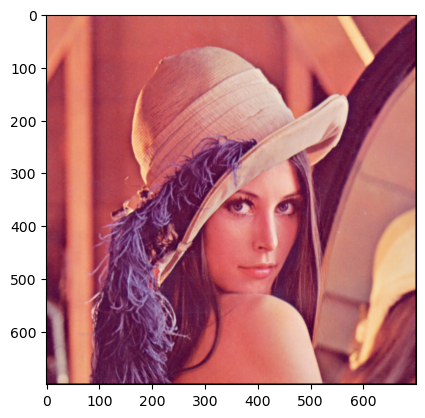

In [9]:
img = cv2.imread('lenna.png')
dst_img = bilinear_interpolation(img, (700, 700))
plt.imshow(cv2.cvtColor(dst_img, cv2.COLOR_BGR2RGB))

## Historgam Equalization
- **直方图均衡化是一种提高图像对比度的方法，通过拉伸图像的灰度级，使得图像的灰度分布更加均匀。**
- $$s_k = T(r_k) = \frac{L-1}{MN}\sum_{j=0}^{k}n_j$$
- $$q = \sum_{k=0}^{p} \frac{hist_{input}(k)}{H*W} * 256 -1$$

(256, 1)


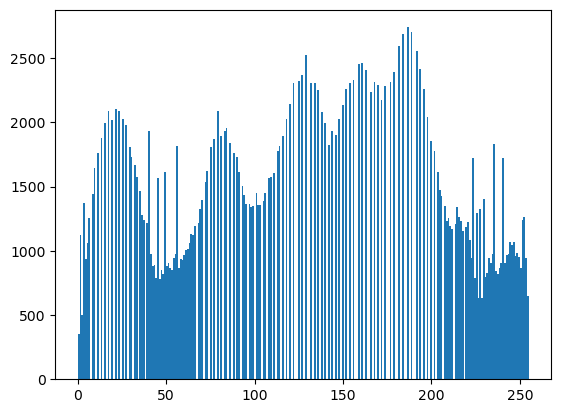

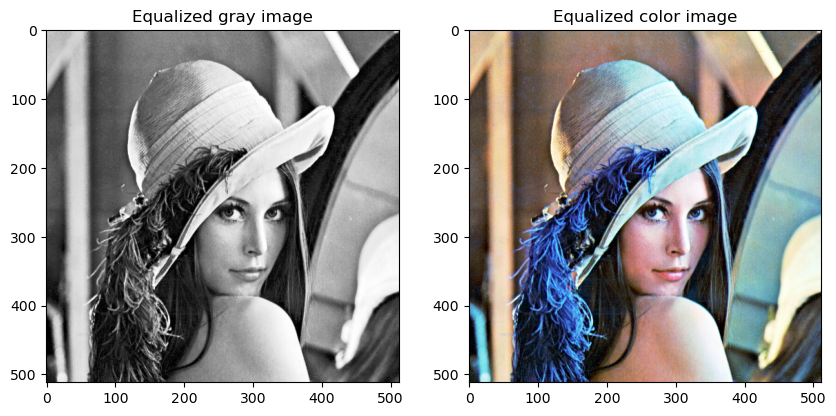

In [23]:
img = cv2.imread('lenna.png')

# gray scale histogram equalization
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized_gray_img = cv2.equalizeHist(gray_img)

hist = cv2.calcHist([equalized_gray_img], [0], None, [256], [0, 256])
print(hist.shape)

plt.figure()
plt.hist(equalized_gray_img.ravel(), 256)
plt.show()

# color histogram equalization
equalized_color_img = img.copy()
for i in range(3):
    equalized_color_img[:, :, i] = cv2.equalizeHist(img[:, :, i])

# show the image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Equalized gray image')
plt.imshow(cv2.cvtColor(equalized_gray_img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Equalized color image')
plt.imshow(cv2.cvtColor(equalized_color_img, cv2.COLOR_BGR2RGB))

## Sobel Filter

**Sobel算子是一种离散的微分算子，用来计算图像的梯度。**
- Horizontal Sobel Filter:
$$G_x = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} * A$$
- Vertical Sobel Filter:
$$G_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} * A$$

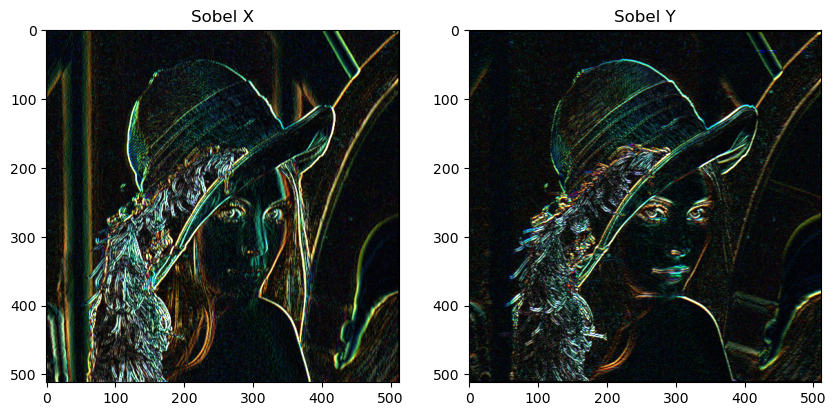

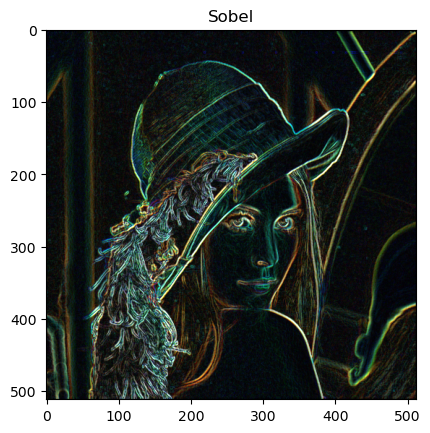

In [24]:
img = cv2.imread('lenna.png')

# sobel filter
x = cv2.Sobel(img, cv2.CV_16S, 1, 0)
y = cv2.Sobel(img, cv2.CV_16S, 0, 1)

# convert back to uint8
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

sobel_img = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

# show the image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Sobel X')
plt.imshow(cv2.cvtColor(absX, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Sobel Y')
plt.imshow(cv2.cvtColor(absY, cv2.COLOR_BGR2RGB))

plt.figure()
plt.title('Sobel')
plt.imshow(cv2.cvtColor(sobel_img, cv2.COLOR_BGR2RGB))